# Baking Data Case Study

**Introduction**

This case study aims to give you an idea of applying EDA and develop a predictive model using different machine learning alogrithms to predict the wheter a customer will deposit to the scheme or not in a real business scenario. In this case study, apart from applying tyou will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.


### Problem Statement
1. Analyze the banking data provided and use Deposits variable as the dependent variable to build a machine learning model to predict the whether a customer will deposit or not.
2. Inshort we have to build a classification Machine learning Predictive model 

In [1]:
### Importing the Required Libraries

In [2]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important;}</style>"))
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

#### Importing the data

In [3]:
bank0 = pd.read_csv('bankdata.csv')

In [4]:
bank0.shape

(11162, 16)

In [5]:
bank0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  11162 non-null  int64  
 1   age         11135 non-null  float64
 2   job         11162 non-null  object 
 3   marital     11152 non-null  object 
 4   education   11162 non-null  object 
 5   default     11162 non-null  object 
 6   balance     11162 non-null  int64  
 7   housing     11162 non-null  object 
 8   loan        11162 non-null  object 
 9   contact     11162 non-null  object 
 10  day         11162 non-null  int64  
 11  month       11162 non-null  object 
 12  duration    11162 non-null  int64  
 13  poutcome    11162 non-null  object 
 14  deposit     11162 non-null  int64  
 15  p_recency   11162 non-null  object 
dtypes: float64(1), int64(5), object(10)
memory usage: 1.4+ MB


In [6]:
bank0.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,poutcome,deposit,p_recency
0,0,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,unknown,1,None
1,1,56.0,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,unknown,1,None
2,2,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,unknown,1,None
3,3,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,579,unknown,1,None
4,4,54.0,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,unknown,1,None


## Data Cleaning

In [7]:
## Removing the extra unnamed column
bank0.drop(labels="Unnamed: 0", axis=1, inplace=True)

In [8]:
# Check if there is any null data values or not
bank0.isna().sum()

age          27
job           0
marital      10
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
poutcome      0
deposit       0
p_recency     0
dtype: int64

In [9]:
# calculating the percentage of null values in of each column
(bank0.isna().sum()/bank0.shape[0])*100

age          0.241892
job          0.000000
marital      0.089590
education    0.000000
default      0.000000
balance      0.000000
housing      0.000000
loan         0.000000
contact      0.000000
day          0.000000
month        0.000000
duration     0.000000
poutcome     0.000000
deposit      0.000000
p_recency    0.000000
dtype: float64

In [10]:
# Extracting the null values rows to inspect if there is any relation with the target variable or not
bank0[ (bank0.age.isna() == True ) | (bank0.marital.isna() == True )]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,poutcome,deposit,p_recency
483,NaN,blue-collar,single,secondary,no,118,yes,no,cellular,17,jul,1275,unknown,1,None
960,NaN,management,divorced,tertiary,no,5037,yes,no,cellular,18,nov,1437,unknown,1,None
1334,NaN,admin.,divorced,secondary,no,4099,no,no,cellular,2,apr,397,unknown,1,None
1455,NaN,student,single,secondary,no,0,no,no,cellular,20,apr,185,unknown,1,None
1485,NaN,admin.,married,tertiary,no,1108,no,no,cellular,21,apr,204,unknown,1,None
2306,25.0,blue-collar,NaN,secondary,no,2007,no,no,cellular,12,jan,265,unknown,1,None
2705,NaN,technician,single,tertiary,no,118,no,no,cellular,5,apr,280,unknown,1,None
2729,NaN,management,married,tertiary,no,1,yes,no,cellular,29,apr,210,unknown,1,None
3283,29.0,self-employed,NaN,tertiary,no,476,yes,no,cellular,18,may,427,unknown,1,None
3341,NaN,self-employed,single,tertiary,no,658,yes,no,cellular,27,mar,283,unknown,1,None


In [11]:
# As the null values does not seem to have any relation with the target variable deposit
# As the percentage of null values is very low so we are dropping the rows that have those values
bank0.dropna(axis=0, inplace=True)

In [12]:
# Check if there is any null data values or not
bank0.isna().sum().sum()

0

In [13]:
# Checking for the imbalance of the target varaible
bank0.deposit.value_counts()

0    5849
1    5276
Name: deposit, dtype: int64

### Assessing the categorical variables

In [14]:
bank0.education.value_counts(normalize=True)

secondary    0.490517
tertiary     0.330517
primary      0.134382
unknown      0.044584
Name: education, dtype: float64

In [15]:
cat_cols = bank0.select_dtypes("object").columns
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'p_recency'],
      dtype='object')

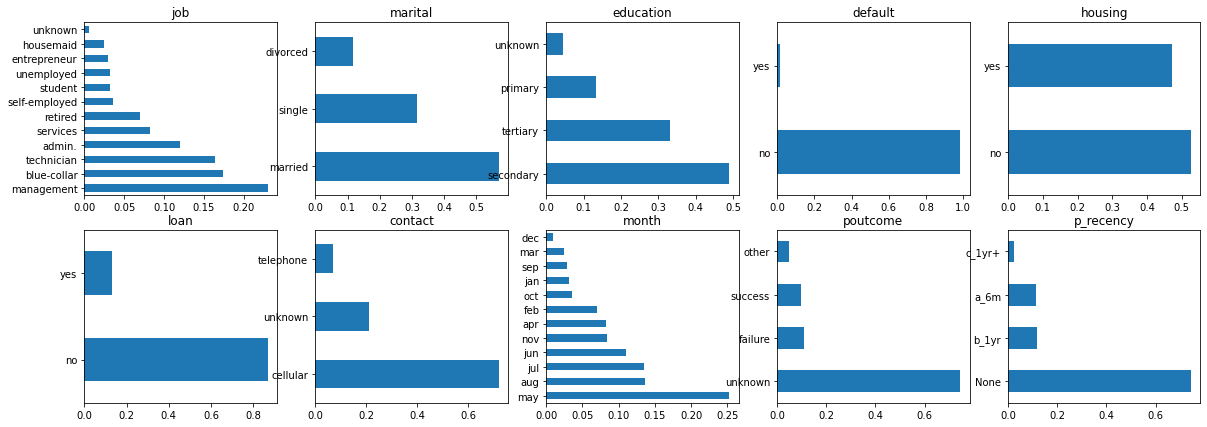

In [16]:
plt.figure(figsize=[20,7])
for ind, col in enumerate(cat_cols):
    plt.subplot(2,5,ind+1)
    bank0[col].value_counts(normalize=True).plot.barh()
    plt.title(col)
plt.show()

In [17]:
bank0.job.value_counts()

management       2559
blue-collar      1933
technician       1820
admin.           1331
services          918
retired           777
self-employed     402
student           359
unemployed        357
entrepreneur      328
housemaid         271
unknown            70
Name: job, dtype: int64

### Numerical variables

In [18]:
num_cols = bank0.select_dtypes('number').columns
num_cols

Index(['age', 'balance', 'day', 'duration', 'deposit'], dtype='object')

**Dropping `day` and `duration` columns**

In [19]:
bank1 = bank0.drop(['duration','day'],axis=1)
bank1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'month', 'poutcome', 'deposit', 'p_recency'],
      dtype='object')

In [20]:
num_cols = bank1.select_dtypes('number').columns
num_cols = num_cols.drop('deposit')
num_cols

Index(['age', 'balance'], dtype='object')

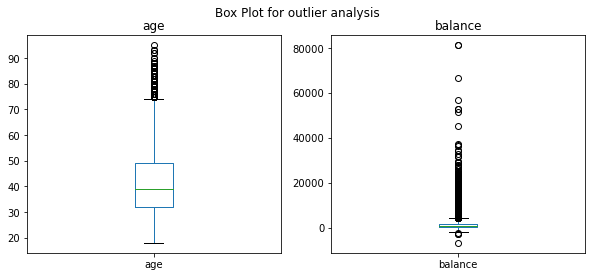

In [21]:
plt.figure(figsize=[10,4])
plt.suptitle("Box Plot for outlier analysis")
for ind, col in enumerate(num_cols):
    plt.subplot(1,2,ind+1)
    bank1[col].plot.box()
    plt.title(col)
plt.show()

In [22]:
# After reviewing the box plot there doesnt seem any domain specific outliers so we will not remove any thing

#### Creating dummy variables for the categorical variables

Handling `default`, `loan`, `housing`

In [23]:
def binary_map(col):
    return col.map({'no':0, 'yes':1})

In [24]:
binary_cols = ['default', 'loan', 'housing']

In [25]:
bank1[binary_cols] = bank1[binary_cols].apply(binary_map)

In [26]:
bank1.housing.value_counts()

0    5865
1    5260
Name: housing, dtype: int64

In [27]:
bank0.housing.value_counts()

no     5865
yes    5260
Name: housing, dtype: int64

**Creating dummy features for education, marital, p_recency, poutcome, contact, job, month**

In [28]:
dumm_cols = ['education', 'marital', 'p_recency', 'contact','poutcome', 'job', 'month']

In [29]:
bank_dummies = pd.get_dummies(bank1[dumm_cols], drop_first=True)

In [30]:
bank_dummies.head()

,education_secondary,education_tertiary,education_unknown,marital_married,marital_single,p_recency_a_6m,p_recency_b_1yr,p_recency_c_1yr+,contact_telephone,contact_unknown,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [31]:
bank_dummies.shape

(11125, 35)

In [32]:
bank1.drop(dumm_cols, axis=1)

,age,default,balance,housing,loan,deposit
0,59.0,0,2343,1,0,1
1,56.0,0,45,0,0,1
2,41.0,0,1270,1,0,1
3,55.0,0,2476,1,0,1
4,54.0,0,184,0,0,1
...,...,...,...,...,...,...
11157,32.0,0,1547,0,0,1
11158,47.0,0,1387,1,0,0
11159,34.0,0,320,1,0,1
11160,31.0,0,243,1,0,1


**Concatenating dummies back on**

In [33]:
bank1 = pd.concat([bank1, bank_dummies],axis=1)
bank1.drop(dumm_cols, axis=1, inplace=True)
bank1.shape

(11125, 41)

In [34]:
bank1.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'deposit',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'marital_married', 'marital_single', 'p_recency_a_6m',
       'p_recency_b_1yr', 'p_recency_c_1yr+', 'contact_telephone',
       'contact_unknown', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep'],
      dtype='object')

---

# Model building
 - dividing into train and test sets
 - MinMax scaling for numeric features
 - build multiple predictive models

#### Dividing into train and test datasets

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
df_train, df_test = train_test_split(bank1, test_size=0.12, random_state=42, stratify=bank1.deposit)

In [37]:
df_train.shape, df_test.shape

((9790, 41), (1335, 41))

In [38]:
df_train.deposit.value_counts(normalize=True)

0    0.525741
1    0.474259
Name: deposit, dtype: float64

In [39]:
df_test.deposit.value_counts(normalize=True)

0    0.525843
1    0.474157
Name: deposit, dtype: float64

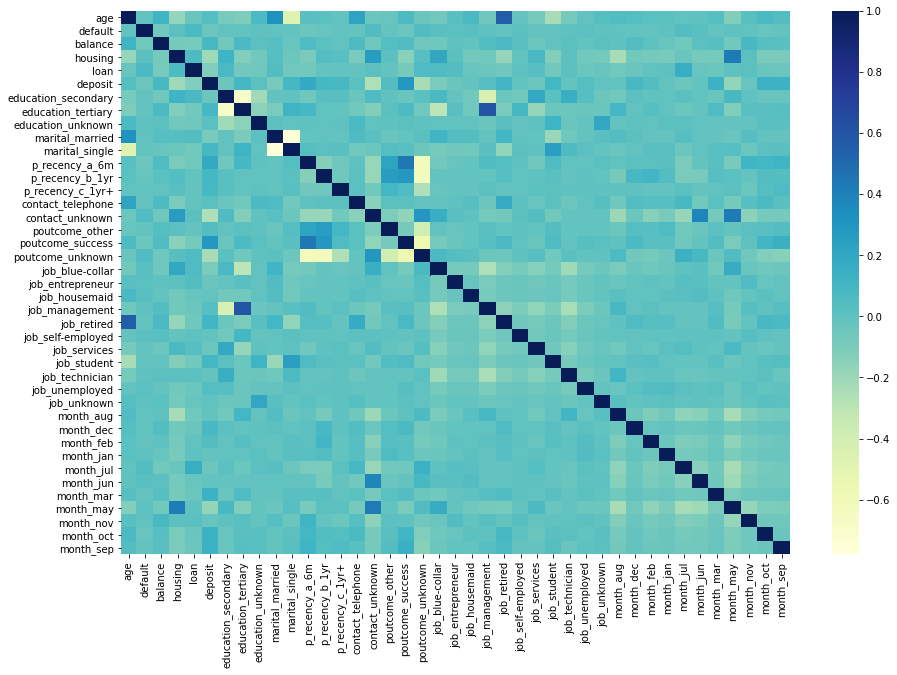

In [40]:
plt.figure(figsize=(15,10))
sns.heatmap( df_train.corr(), cmap="YlGnBu", fmt="d" )
plt.show()

In [41]:
## From here we can see that there is not that much of correlation between the independent variables so not problem of multicollinearity should arise

#### MinMax scaling for numeric features

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
scaler = MinMaxScaler()

In [44]:
df_train[['age', 'balance']].describe()

,age,balance
count,9790.000000,9790.000000
mean,41.295506,1523.620735
std,11.925733,3168.447276
min,18.000000,-6847.000000
25%,32.000000,123.250000
50%,39.000000,556.000000
75%,49.000000,1712.750000
max,95.000000,81204.000000


In [45]:
df_train[['age', 'balance']] = scaler.fit_transform(df_train[['age', 'balance']])

In [46]:
df_train[['age', 'balance']].describe()

,age,balance
count,9790.000000,9790.000000
mean,0.302539,0.095066
std,0.154880,0.035984
min,0.000000,0.000000
25%,0.181818,0.079162
50%,0.272727,0.084076
75%,0.402597,0.097214
max,1.000000,1.000000


In [47]:
df_test[['age', 'balance']] = scaler.transform(df_test[['age', 'balance']])

## Building predictive models and evaluating using Cross Validation

In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score

In [49]:
X_train = df_train.drop('deposit', axis=1)
y_train = df_train['deposit']
X_test = df_test.drop('deposit', axis=1)
y_test = df_test['deposit']

In [50]:
X_train.shape

(9790, 40)

In [51]:
y_train.shape, y_test.shape

((9790,), (1335,))

### Beginning with Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
logreg = LogisticRegression( random_state=42 )

In [54]:
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

**Evaluating the model**

In [55]:
y_train_pred = logreg.predict(X_train)

In [56]:
# accuracy_score(y_train, y_train_pred)
cross_val_score(logreg, X_train, y_train, cv=5, n_jobs=-1).mean()

0.7016343207354443

In [57]:
confusion_matrix(y_train, y_train_pred)

array([[4244,  903],
       [1973, 2670]], dtype=int64)

In [58]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.68      0.82      0.75      5147
           1       0.75      0.58      0.65      4643

    accuracy                           0.71      9790
   macro avg       0.71      0.70      0.70      9790
weighted avg       0.71      0.71      0.70      9790



**So the overall accuracy is 70% where as the recall is 58%(for 1), which indicates how much less we have False Negative i.e the customer has deposited but we have predicted that the customer will not deposit. Which is huge loss for the bank and hence we have to minimize this loss as much as possible.**

### Ridge Regression

In [59]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV

In [60]:
%%time
param = {"alpha":[1e-15, 1e-10, 1e-5, 0.001, 0.01, 0.1, 1, 5 , 10, 20, 40, 50 , 70, 100]}
ridge = RidgeClassifier()
ridge_classifier = GridSearchCV(ridge, param, cv=5, 
                                n_jobs=-1, verbose=1 , 
                                return_train_score=True)
ridge_classifier.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Wall time: 1.48 s


[Parallel(n_jobs=-1)]: Done  63 out of  70 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    1.3s finished


GridSearchCV(cv=5, estimator=RidgeClassifier(), n_jobs=-1,
             param_grid={'alpha': [1e-15, 1e-10, 1e-05, 0.001, 0.01, 0.1, 1, 5,
                                   10, 20, 40, 50, 70, 100]},
             return_train_score=True, verbose=1)

In [61]:
X_train.shape

(9790, 40)

In [62]:
ridge_classifier.best_estimator_, ridge_classifier.best_params_, ridge_classifier.best_score_

(RidgeClassifier(alpha=100), {'alpha': 100}, 0.7037793667007151)

In [63]:
ridge_best_model = ridge_classifier.best_estimator_

In [64]:
confusion_matrix(y_train, ridge_best_model.predict(X_train))

array([[4195,  952],
       [1934, 2709]], dtype=int64)

In [65]:
# Printing out the classification report to see various values of evaluation metric.
print(classification_report(y_train, ridge_best_model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.68      0.82      0.74      5147
           1       0.74      0.58      0.65      4643

    accuracy                           0.71      9790
   macro avg       0.71      0.70      0.70      9790
weighted avg       0.71      0.71      0.70      9790



**Note that after using the Ridge Regression with cross validation the best score we have got is 70%, here also the precison is very low**


### SVM Classifiers

In [66]:
from sklearn.svm import SVC

In [67]:
%%time
param_grid = {'C': [0.1, 1, 10, 100,],  
              'gamma': [1, 0.1, 0.01, 0.001,], 
              'kernel': ['rbf']} 
svm_grid = GridSearchCV(SVC(), param_grid,verbose = 3, n_jobs=-1, ) 
svm_grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  5.2min finished


Wall time: 5min 35s


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=3)

In [68]:
svm_grid.best_estimator_, svm_grid.best_params_, svm_grid.best_score_

(SVC(C=10, gamma=0.1),
 {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'},
 0.7165474974463739)

In [69]:
svm_grid_best_estimator = svm_grid.best_estimator_

In [70]:
confusion_matrix(y_train, svm_grid.predict(X_train))

array([[4529,  618],
       [1881, 2762]], dtype=int64)

In [72]:
cross_val_score(svm_grid_best_estimator, X_train, y_train, cv=5, n_jobs=-1 )

array([0.72165475, 0.7165475 , 0.72318693, 0.70837589, 0.71297242])

#### After using the SVM we can see that the overall accuracy of the model has increased and so did the precision value of the model, but the recall score is very less

### Using KNN (k-nearest neighbours)

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
# Finding the value of n in knn using error rate
error_rate = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

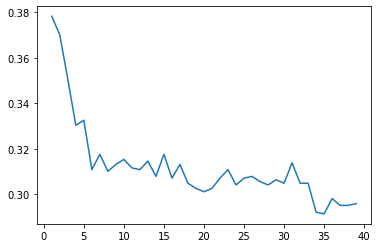

In [75]:
plt.plot(range(1,40), error_rate)

**As we can see that around 20 is the best value of n_neighbours**

In [76]:
knn = KNeighborsClassifier(n_neighbors=20, n_jobs=-1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=20)

In [77]:
# Printing out the classification report to see various values of evaluation metric.
cross_val_score(knn, X_train, y_train, cv=5, n_jobs=-1 )

array([0.71603677, 0.69816139, 0.69101124, 0.68794688, 0.69509704])

### Using Decision Tree Classifiers

In [78]:
# Importing the libraries
from sklearn.tree import DecisionTreeClassifier

In [79]:
dtclassifier = DecisionTreeClassifier()

In [80]:
%%time
# Using Gridsearch CV to find the optimal parameter within decision Tree
params = {'max_depth': [3, 5, 10, 15, 20],
          'max_features': [3, 5, 7, 11, 15],
          'min_samples_leaf': [20, 50, 100, 200, 400],
         }
dt_grid = GridSearchCV(dtclassifier, params, n_jobs = -1, verbose=1)

Wall time: 0 ns


In [81]:
dt_grid.fit(X_train, y_train)
dt_grid.best_estimator_, dt_grid.best_params_, dt_grid.best_score_

Fitting 5 folds for each of 125 candidates, totalling 625 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 625 out of 625 | elapsed:    6.5s finished


(DecisionTreeClassifier(max_depth=15, max_features=7, min_samples_leaf=20),
 {'max_depth': 15, 'max_features': 7, 'min_samples_leaf': 20},
 0.6896833503575077)

In [82]:
dt_grid_best_estimator = dt_grid.best_estimator_

In [83]:
# Printing out the classification report to see various values of evaluation metric.
cross_val_score(dt_grid_best_estimator, X_train, y_train, cv=5, n_jobs=-1 )

array([0.67671093, 0.66956078, 0.68998979, 0.67364658, 0.6659857 ])

In [84]:
## Here knn has given the highest accuracy so far.

## Ensemble methods Boosting

### Adaptive Boosting

In [85]:
%%time
# with SVM as the base estimator
from sklearn.ensemble import AdaBoostClassifier
svm_ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                             n_estimators=100,)
cross_val_score(svm_ada, X_train, y_train, cv=5, n_jobs=-1 )

Wall time: 3.7 s


array([0.71041879, 0.71961185, 0.70786517, 0.71807967, 0.69305414])

In [86]:
%%time
# with SVM as the base estimator
from sklearn.ensemble import AdaBoostClassifier
svm_ada2 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                             n_estimators=200,)
cross_val_score(svm_ada2, X_train, y_train, cv=5, n_jobs=-1 )

Wall time: 6.95 s


array([0.70735444, 0.71195097, 0.70122574, 0.71705822, 0.69662921])

In [87]:
#### As the crossval accuracy is not increasing that much so we are using Logistic Regressionn as our other base_estimator

In [88]:
log_ada = AdaBoostClassifier(base_estimator=LogisticRegression(),
                             n_estimators=100)
cross_val_score(log_ada, X_train, y_train, cv=5, n_jobs=-1 ) 

array([0.70888662, 0.70326864, 0.69509704, 0.71092952, 0.69816139])

In [89]:
log_ada2 = AdaBoostClassifier(base_estimator=LogisticRegression(),
                             n_estimators=200)
cross_val_score(log_ada2, X_train, y_train, cv=5, n_jobs=-1 ) 

array([0.70122574, 0.70735444, 0.69203269, 0.70888662, 0.70326864])

In [90]:
log_ada3 = AdaBoostClassifier(base_estimator=LogisticRegression(),
                             n_estimators=300)
cross_val_score(log_ada3, X_train, y_train, cv=5, n_jobs=-1 ) 

array([0.70071502, 0.7124617 , 0.69662921, 0.70122574, 0.69560776])

In [91]:
#### As the crossval accuracy is not increasing that much

### Using RandomForest 

In [92]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
rf = RandomForestClassifier(random_state=42, n_estimators=50, oob_score=True)

In [94]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, oob_score=True, random_state=42)

**Performance on the train set**

In [95]:
rf.oob_score_

0.6903983656792646

In [96]:
# Random Forest
cross_val_score(rf, X_train, y_train, cv=5, n_jobs=-1).mean()

0.6949948927477017

# Feature selection

In [97]:
X_train.shape

(9790, 40)

## Cross validation for feature selection

#### Using RFECV

In [98]:
from sklearn.feature_selection import RFECV

In [99]:
rfecv = RFECV(estimator=logreg, cv=4)

In [100]:
%%time
rfecv.fit(X_train, y_train)

Wall time: 14 s


RFECV(cv=4, estimator=LogisticRegression(random_state=42))

In [101]:
rfecv.grid_scores_

array([0.53840666, 0.60561702, 0.61664819, 0.62420742, 0.63564717,
       0.64974252, 0.6523982 , 0.65883286, 0.66434899, 0.6686382 ,
       0.67517565, 0.68008003, 0.67395292, 0.69489155, 0.69611716,
       0.69703661, 0.6975469 , 0.69662761, 0.69775131, 0.69989576,
       0.70101991, 0.69928351, 0.70081567, 0.70326694, 0.69928376,
       0.7002033 , 0.70122454, 0.70030517, 0.69979447, 0.69948818,
       0.69867093, 0.69907951, 0.69959034, 0.6992838 , 0.70071396,
       0.70061179, 0.70071396, 0.70102029, 0.70102046, 0.70102037])

In [102]:
num_features = X_train.shape
num_features[1]

40

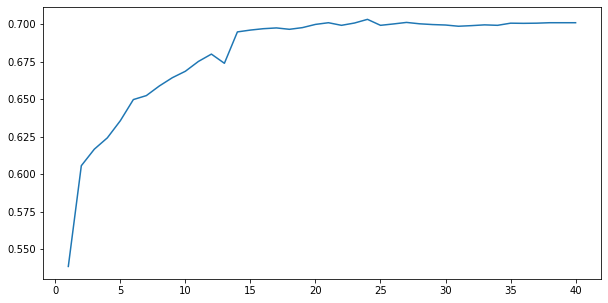

In [103]:
# Plotting the different accuracy values at diffferent features to find the optimal number of features
plt.figure(figsize=[10, 5])
plt.plot(range(1, num_features[1]+1), rfecv.grid_scores_)
plt.show()

In [104]:
# Finding the optimal number of features using a inbuild parameter in rfecv
rfecv.n_features_

24

In [105]:
## using RFE with the optimal number of Features = 24

In [106]:
from sklearn.feature_selection import RFE

In [107]:
logreg = LogisticRegression(random_state=42)

In [108]:
rfe = RFE(estimator=logreg, n_features_to_select=24)

In [109]:
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(random_state=42), n_features_to_select=24)

In [110]:
rfe.ranking_

array([13,  1,  1,  1,  1,  5,  2,  6,  1, 12,  1,  3,  1,  1,  1,  4,  1,
       16, 14,  9,  7,  8,  1, 10, 11,  1, 17,  1,  1,  1,  1,  1,  1,  1,
       15,  1,  1,  1,  1,  1])

In [111]:
X_train.columns[rfe.support_]

Index(['default', 'balance', 'housing', 'loan', 'marital_married',
       'p_recency_a_6m', 'p_recency_c_1yr+', 'contact_telephone',
       'contact_unknown', 'poutcome_success', 'job_retired', 'job_student',
       'job_unemployed', 'job_unknown', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep'],
      dtype='object')

In [112]:
X_train2 = X_train.loc[:,rfe.support_]
X_train2.shape

(9790, 24)

In [113]:
X_train2.columns

Index(['default', 'balance', 'housing', 'loan', 'marital_married',
       'p_recency_a_6m', 'p_recency_c_1yr+', 'contact_telephone',
       'contact_unknown', 'poutcome_success', 'job_retired', 'job_student',
       'job_unemployed', 'job_unknown', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep'],
      dtype='object')

Evaluation using cross val score

In [114]:
print(cross_val_score(logreg, X_train2, y_train, n_jobs=-1))
print(cross_val_score(logreg, X_train2, y_train, n_jobs=-1).mean())

[0.69918284 0.7145046  0.69969356 0.70275792 0.69509704]
0.7022471910112359


In [116]:
### After using RFE with optimal number of features and checking the cross validation score is 70%

#### RFE Logistic Regression with adaboost

In [117]:
log_ada_rfecv = AdaBoostClassifier(base_estimator=LogisticRegression(),
                             n_estimators=100)
a = cross_val_score(log_ada_rfecv, X_train2, y_train, cv=5, n_jobs=-1 )
a, a.mean()

(array([0.70582227, 0.70684372, 0.69816139, 0.71041879, 0.69918284]),
 0.7040858018386108)

In [118]:
log_ada_rfecv2 = AdaBoostClassifier(base_estimator=LogisticRegression(),
                             n_estimators=200)
a = cross_val_score(log_ada_rfecv2, X_train2, y_train, cv=5, n_jobs=-1 )
a, a.mean()

(array([0.69203269, 0.71297242, 0.69458631, 0.70531154, 0.69867211]),
 0.700715015321757)

In [119]:
## The accuracy does not seem to be increasing  so we will stop here and use some other algorith

## Hyper-parameter tuning using Cross Validation For Random Forest Classifier

In [120]:
from sklearn.ensemble import RandomForestClassifier

In [122]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [123]:
hyper_params = {'max_depth': [3, 5, 10, 15,],
                'max_features': [3, 5, 7, 11,],
                'min_samples_leaf': [20, 50, 100, 200],
                'n_estimators': [10, 25, 50, 80]
               }

In [125]:
model_cv = GridSearchCV(estimator=rf, 
             param_grid=hyper_params,
             verbose=1,
             cv=4,
             n_jobs=-1,
             return_train_score=True,)

In [126]:
model_cv.fit(X_train, y_train)

Fitting 4 folds for each of 256 candidates, totalling 1024 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done 458 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 808 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1024 out of 1024 | elapsed:  2.9min finished


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 15],
                         'max_features': [3, 5, 7, 11],
                         'min_samples_leaf': [20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 80]},
             return_train_score=True, verbose=1)

In [127]:
model_cv.best_score_

0.7150142247676894

In [128]:
model_cv.best_estimator_

RandomForestClassifier(max_depth=15, max_features=5, min_samples_leaf=20,
                       n_estimators=50, n_jobs=-1, random_state=42)

In [129]:
cv_df = pd.DataFrame(model_cv.cv_results_)

In [130]:
cv_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,...,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.097991,0.018220,0.039995,0.016969,3,3,20,10,"{'max_depth': 3, 'max_features': 3, 'min_sampl...",0.665850,...,0.646097,0.659243,0.007754,247,0.664124,0.657586,0.661855,0.661174,0.661185,0.002347
1,0.227978,0.045428,0.103991,0.029391,3,3,20,25,"{'max_depth': 3, 'max_features': 3, 'min_sampl...",0.685049,...,0.657540,0.674463,0.010367,219,0.678017,0.678289,0.675201,0.676563,0.677017,0.001237
2,0.349967,0.051338,0.133988,0.058339,3,3,20,50,"{'max_depth': 3, 'max_features': 3, 'min_sampl...",0.688317,...,0.664078,0.677629,0.008715,202,0.676927,0.678425,0.682827,0.681602,0.679945,0.002370
3,0.567947,0.043448,0.117989,0.022889,3,3,20,80,"{'max_depth': 3, 'max_features': 3, 'min_sampl...",0.688317,...,0.666122,0.679264,0.008229,191,0.679788,0.679924,0.681738,0.683644,0.681273,0.001571
4,0.117990,0.034579,0.045994,0.017319,3,3,50,10,"{'max_depth': 3, 'max_features': 3, 'min_sampl...",0.659722,...,0.645689,0.657303,0.006832,248,0.652547,0.656497,0.659676,0.660902,0.657405,0.003233


In [131]:
cv_df.sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,...,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
210,0.613943,0.119237,0.079994,0.051219,15,5,20,50,"{'max_depth': 15, 'max_features': 5, 'min_samp...",0.720180,...,0.704536,0.715014,0.006473,1,0.730864,0.729229,0.734713,0.732671,0.731869,0.002044
209,0.317970,0.022179,0.051996,0.013265,15,5,20,25,"{'max_depth': 15, 'max_features': 5, 'min_samp...",0.720180,...,0.711075,0.714300,0.003845,2,0.729501,0.724598,0.733896,0.733215,0.730303,0.003694
211,0.947915,0.056703,0.097990,0.014281,15,5,20,80,"{'max_depth': 15, 'max_features': 5, 'min_samp...",0.718137,...,0.705353,0.714299,0.005400,3,0.729774,0.728548,0.731990,0.731036,0.730337,0.001298
226,0.799927,0.060128,0.129987,0.080267,15,7,20,50,"{'max_depth': 15, 'max_features': 7, 'min_samp...",0.717729,...,0.710257,0.713380,0.004209,4,0.736312,0.732362,0.736211,0.739752,0.736159,0.002615
227,1.045904,0.261869,0.255979,0.221970,15,7,20,80,"{'max_depth': 15, 'max_features': 7, 'min_samp...",0.716503,...,0.711075,0.713278,0.003305,5,0.735494,0.733043,0.737165,0.738935,0.736159,0.002172


In [132]:
sel_cols = ['param_max_depth','param_max_features','param_min_samples_leaf','param_n_estimators', 'rank_test_score',  'mean_test_score']

In [133]:
cv_df.sort_values(by='rank_test_score')[sel_cols].head(20)

,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,rank_test_score,mean_test_score
210,15,5,20,50,1,0.715014
209,15,5,20,25,2,0.714300
211,15,5,20,80,3,0.714299
226,15,7,20,50,4,0.713380
227,15,7,20,80,5,0.713278
241,15,11,20,25,6,0.712257
243,15,11,20,80,7,0.712155
242,15,11,20,50,8,0.712052
147,10,5,20,80,9,0.711644
146,10,5,20,50,10,0.711236


### Understand better the effect of Hyper-parameter (Using Coarse Tuning and Fine Tuning)

In [134]:
cv_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_max_features', 'param_min_samples_leaf',
       'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

### Visualization 

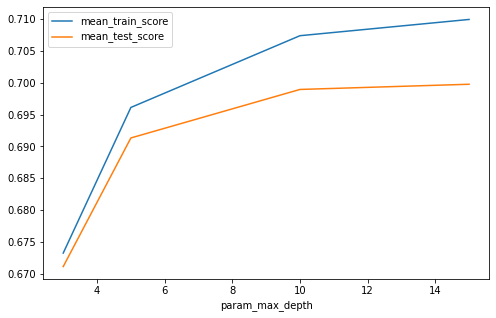

In [135]:
cv_df.groupby('param_max_depth')['mean_train_score', 'mean_test_score'].mean().plot(figsize=[8,5])
plt.show()

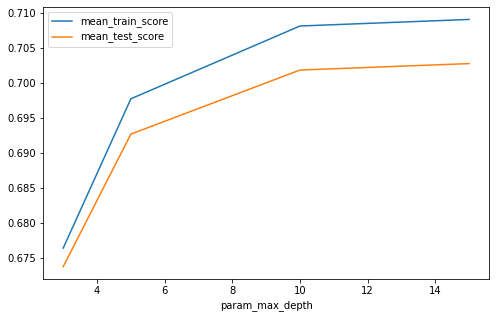

In [136]:
cv_df.groupby('param_max_depth')['mean_train_score', 'mean_test_score'].agg(np.median).plot(figsize=[8,5])
plt.show()

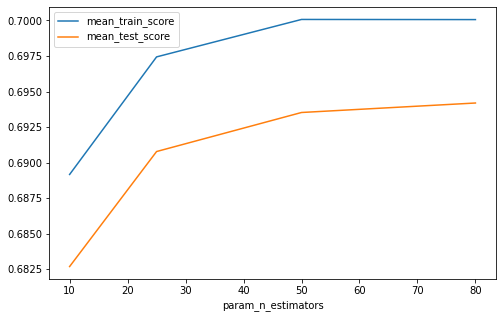

In [137]:
cv_df.groupby('param_n_estimators')['mean_train_score', 'mean_test_score'].agg(np.mean).plot(figsize=[8,5])
plt.show()

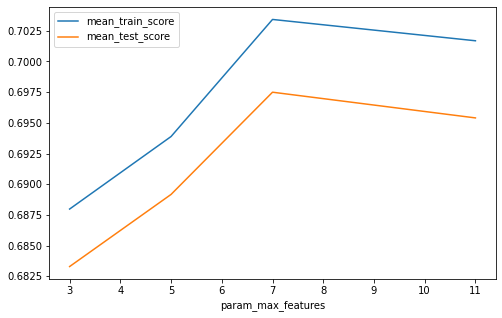

In [138]:
cv_df.groupby('param_max_features')['mean_train_score', 'mean_test_score'].agg(np.median).plot(figsize=[8,5])
plt.show()

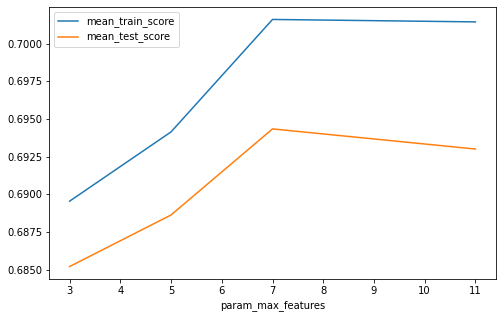

In [139]:
cv_df.groupby('param_max_features')['mean_train_score', 'mean_test_score'].agg(np.mean).plot(figsize=[8,5])
plt.show()

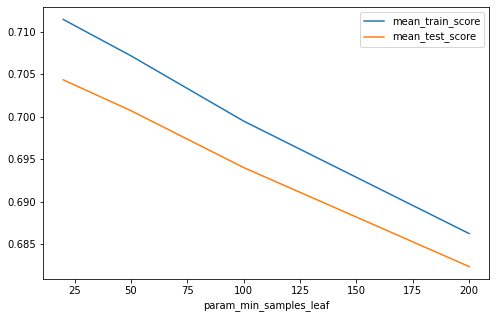

In [140]:
cv_df.groupby('param_min_samples_leaf')['mean_train_score', 'mean_test_score'].agg(np.median).plot(figsize=[8,5])
plt.show()

#### Fine-tuning using RandomizedSearchCV

In [141]:
from sklearn.model_selection import RandomizedSearchCV

In [142]:
np.arange(20,30)

array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [143]:
hyper_parameters = {'max_depth' : [6,7,8,9,10,11,12],
                    'min_samples_leaf': np.arange(1,30),
                    'n_estimators': np.arange(40,60),
                    'max_features': np.arange(5,11)    
                   }

In [144]:
rf = RandomForestClassifier( random_state=42,)

In [145]:
model_cv2 = RandomizedSearchCV(estimator=rf,
                        param_distributions=hyper_parameters,
                        verbose=1,
                        cv=5,
                        return_train_score=True,
                        n_jobs=-1)

In [146]:
model_cv2.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   12.2s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [6, 7, 8, 9, 10, 11, 12],
                                        'max_features': array([ 5,  6,  7,  8,  9, 10]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                                        'n_estimators': array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
       57, 58, 59])},
                   return_train_score=True, verbose=1)

In [147]:
model_cv2.best_estimator_, model_cv2.best_params_, model_cv2.best_score_

(RandomForestClassifier(max_depth=11, max_features=10, min_samples_leaf=4,
                        n_estimators=53, random_state=42),
 {'n_estimators': 53,
  'min_samples_leaf': 4,
  'max_features': 10,
  'max_depth': 11},
 0.7164453524004086)

In [148]:
a = cross_val_score(model_cv2.best_estimator_, X_train, y_train, n_jobs=-1)
a, a.mean()

(array([0.7206333 , 0.72216547, 0.70837589, 0.71705822, 0.71399387]),
 0.7164453524004086)

### Extracting the best model and asessing test performance (model after fine tuning)

In [149]:
rf_best = model_cv2.best_estimator_

In [150]:
rf_best

RandomForestClassifier(max_depth=11, max_features=10, min_samples_leaf=4,
                       n_estimators=53, random_state=42)

In [151]:
y_test_pred = rf_best.predict(X_test)

In [152]:
### Checking the accuracy of the Random Forest Model after Fine tuning and chekcing it in the Test Set

In [153]:
accuracy_score(y_test, y_test_pred)

0.7018726591760299

In [154]:
# Printing out the classification report to see various values of evaluation metric.

confusion_matrix(y_test, y_test_pred), print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.69      0.78      0.73       702
           1       0.72      0.61      0.66       633

    accuracy                           0.70      1335
   macro avg       0.70      0.70      0.70      1335
weighted avg       0.70      0.70      0.70      1335



(array([[549, 153],
        [245, 388]], dtype=int64),
 None)

In [155]:
## And SVM has performed the best out of all the model

In [156]:
svm_grid_best_estimator

SVC(C=10, gamma=0.1)

In [157]:
accuracy_score(y_test, svm_grid_best_estimator.predict(X_test))

0.7280898876404495

In [158]:
confusion_matrix(y_test,  svm_grid_best_estimator.predict(X_test)), print(  classification_report(y_test,  svm_grid_best_estimator.predict(X_test))   )

              precision    recall  f1-score   support

           0       0.70      0.84      0.77       702
           1       0.78      0.60      0.68       633

    accuracy                           0.73      1335
   macro avg       0.74      0.72      0.72      1335
weighted avg       0.74      0.73      0.72      1335



(array([[593, 109],
        [254, 379]], dtype=int64),
 None)